### Strategy:-

- try to get the best k-means clustering using the elbow method
- check-out the different clusters and find-out which clusters have most concentration of the positive cases
- try to build a classifier on top of this clusters and check if the classification improves with that

In [1]:
import numpy as np

X = np.load('../mount/Data_Manipulation_datasets/processed_X.npy')
Y = np.load('../mount/Data_Manipulation_datasets/processed_Y.npy')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=24)

kmeans = KMeans(n_clusters=8)

kmeans.fit(X_train)

KMeans()

For n_clusters = 5 The average silhouette_score is : 0.12938001116847422
For n_clusters = 10 The average silhouette_score is : 0.1153021782553485
For n_clusters = 20 The average silhouette_score is : 0.10700728246187968
For n_clusters = 30 The average silhouette_score is : 0.09579062980110194
For n_clusters = 40 The average silhouette_score is : 0.08849299206850654
For n_clusters = 50 The average silhouette_score is : 0.07981795820167885
For n_clusters = 60 The average silhouette_score is : 0.0777581909495831
For n_clusters = 70 The average silhouette_score is : 0.0757728985302748
For n_clusters = 80 The average silhouette_score is : 0.07227344327541695
For n_clusters = 90 The average silhouette_score is : 0.07106721660746637
For n_clusters = 100 The average silhouette_score is : 0.07546263915946465


Text(0.5, 1.0, 'Silhouette Score vs No of clusters')

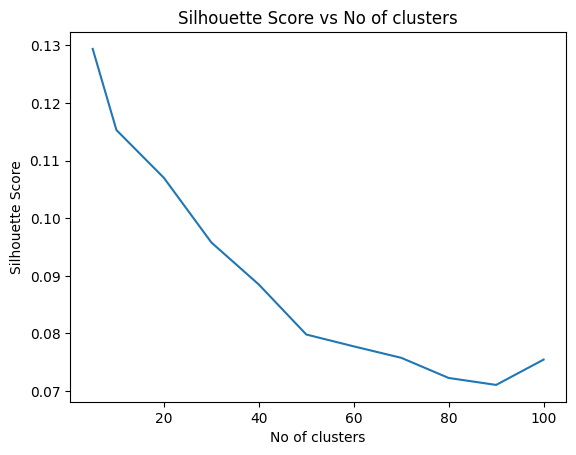

In [8]:
from sklearn.metrics import silhouette_score
from matplotlib import pyplot as plt

no_clusters = [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
silhouette_scores = []

for n_clusters in no_clusters:
    kmeans = KMeans(n_clusters=n_clusters)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)
    
plt.plot(no_clusters, silhouette_scores)
plt.xlabel('No of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs No of clusters')

For n_clusters = 2 The average silhouette_score is : 0.2686640999799883
For n_clusters = 3 The average silhouette_score is : 0.2728077374320171
For n_clusters = 4 The average silhouette_score is : 0.11967752119523496
For n_clusters = 5 The average silhouette_score is : 0.12932655075794977
For n_clusters = 6 The average silhouette_score is : 0.1213371233221858
For n_clusters = 7 The average silhouette_score is : 0.1379908906497734
For n_clusters = 8 The average silhouette_score is : 0.11493959484350141
For n_clusters = 9 The average silhouette_score is : 0.14688165168513043
For n_clusters = 10 The average silhouette_score is : 0.1368168094778762
For n_clusters = 11 The average silhouette_score is : 0.13903349326702408
For n_clusters = 12 The average silhouette_score is : 0.1212050481985783
For n_clusters = 14 The average silhouette_score is : 0.13078273790159317
For n_clusters = 16 The average silhouette_score is : 0.12103009685271723
For n_clusters = 18 The average silhouette_score is 

Text(0.5, 1.0, 'Silhouette Score vs No of clusters')

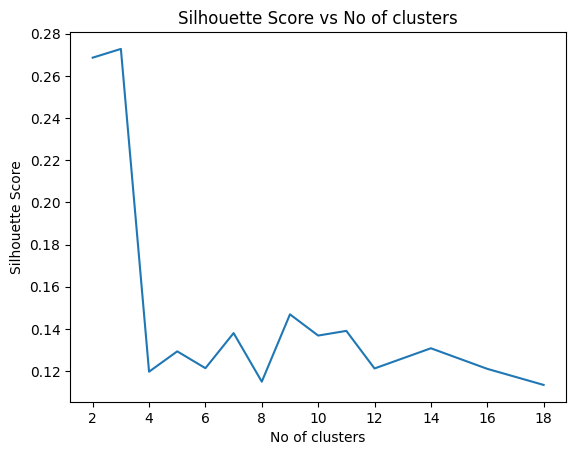

In [9]:
from sklearn.metrics import silhouette_score
from matplotlib import pyplot as plt

no_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 16, 18]
silhouette_scores = []

for n_clusters in no_clusters:
    kmeans = KMeans(n_clusters=n_clusters)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)
    
plt.plot(no_clusters, silhouette_scores)
plt.xlabel('No of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs No of clusters')

It is pretty evident that k=3 seems to be the best clustering scenario with kmeans. But the Silhoutte score is still low which means the clustering is not so good. We can have a go with the DBSCAN algorithm

In [10]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
cluster_labels = dbscan.fit_predict(X)

from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X, cluster_labels)
print("The average silhouette_score is :", silhouette_avg)

The average silhouette_score is : -0.39719597257665124


which is a even worse score. lets try to do grid search for best hyper-parameters (eps and min_samples)

In [17]:
# grid search for the DBSCAN hyperparameters
from sklearn.model_selection import GridSearchCV

param_grid = {'eps': [0.1, 0.5, 1, 2, 3, 4, 5],
            'min_samples': [5, 10, 15, 20, 25]}

def silhouette_score_custom(estimator, X):
    clusters = estimator.fit_predict(X)
    score = silhouette_score(X, clusters)
    return score

dbscan = DBSCAN()
grid_search = GridSearchCV(dbscan, param_grid, cv=3, scoring=silhouette_score_custom)
grid_search.fit(X)

c:\Users\aanur\projects\.venv\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\aanur\projects\.venv\lib\site-packages\sklearn\model_selection\_validation.py", line 969, in _score
    scores = scorer(estimator, X_test, **score_params)
  File "C:\Users\aanur\AppData\Local\Temp\ipykernel_2516\3806143842.py", line 9, in silhouette_score_custom
    score = silhouette_score(X, clusters)
  File "c:\Users\aanur\projects\.venv\lib\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "c:\Users\aanur\projects\.venv\lib\site-packages\sklearn\metrics\cluster\_unsupervised.py", line 141, in silhouette_score
    return np.mean(silhouette_samples(X, labels, metric=metric, **kwds))
  File "c:\Users\aanur\projects\.venv\lib\site-packages\sklearn\utils\_param_valida

GridSearchCV(cv=3, estimator=DBSCAN(),
             param_grid={'eps': [0.1, 0.5, 1, 2, 3, 4, 5],
                         'min_samples': [5, 10, 15, 20, 25]},
             scoring=<function silhouette_score_custom at 0x000002321FC4F910>)

In [20]:
import pandas as pd 

df = pd.DataFrame(grid_search.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_eps,param_min_samples,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.602162,0.051460,0.156155,0.004333,0.1,5,"{'eps': 0.1, 'min_samples': 5}",NaN,NaN,NaN,NaN,NaN,18
1,0.540101,0.022727,0.164527,0.014506,0.1,10,"{'eps': 0.1, 'min_samples': 10}",NaN,NaN,NaN,NaN,NaN,18
2,0.524107,0.013482,0.180532,0.011280,0.1,15,"{'eps': 0.1, 'min_samples': 15}",NaN,NaN,NaN,NaN,NaN,18
3,0.550099,0.019496,0.164535,0.019617,0.1,20,"{'eps': 0.1, 'min_samples': 20}",NaN,NaN,NaN,NaN,NaN,18
4,0.532862,0.017630,0.155198,0.016034,0.1,25,"{'eps': 0.1, 'min_samples': 25}",NaN,NaN,NaN,NaN,NaN,18
5,0.590136,0.050608,4.042781,0.179726,0.5,5,"{'eps': 0.5, 'min_samples': 5}",-0.273827,-0.123877,-0.213646,-0.203783,0.061613,16
6,0.554089,0.016655,0.150701,0.015540,0.5,10,"{'eps': 0.5, 'min_samples': 10}",NaN,NaN,NaN,NaN,NaN,18
7,0.511424,0.023080,0.146521,0.009205,0.5,15,"{'eps': 0.5, 'min_samples': 15}",NaN,NaN,NaN,NaN,NaN,18
8,0.536444,0.018069,0.155186,0.013273,0.5,20,"{'eps': 0.5, 'min_samples': 20}",NaN,NaN,NaN,NaN,NaN,18
9,0.534682,0.013998,0.150024,0.007149,0.5,25,"{'eps': 0.5, 'min_samples': 25}",NaN,NaN,NaN,NaN,NaN,18


In [21]:
grid_search.best_params_

{'eps': 4, 'min_samples': 5}

In [22]:
from sklearn.model_selection import GridSearchCV

param_grid = {'eps': [3.5, 4, 4.5],
            'min_samples': [1,2,3,4,5,6,7,8]}

def silhouette_score_custom(estimator, X):
    clusters = estimator.fit_predict(X)
    score = silhouette_score(X, clusters)
    return score

dbscan = DBSCAN()
grid_search = GridSearchCV(dbscan, param_grid, cv=3, scoring=silhouette_score_custom)
grid_search.fit(X)

c:\Users\aanur\projects\.venv\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\aanur\projects\.venv\lib\site-packages\sklearn\model_selection\_validation.py", line 969, in _score
    scores = scorer(estimator, X_test, **score_params)
  File "C:\Users\aanur\AppData\Local\Temp\ipykernel_2516\1962499544.py", line 8, in silhouette_score_custom
    score = silhouette_score(X, clusters)
  File "c:\Users\aanur\projects\.venv\lib\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "c:\Users\aanur\projects\.venv\lib\site-packages\sklearn\metrics\cluster\_unsupervised.py", line 141, in silhouette_score
    return np.mean(silhouette_samples(X, labels, metric=metric, **kwds))
  File "c:\Users\aanur\projects\.venv\lib\site-packages\sklearn\utils\_param_valida

GridSearchCV(cv=3, estimator=DBSCAN(),
             param_grid={'eps': [3.5, 4, 4.5],
                         'min_samples': [1, 2, 3, 4, 5, 6, 7, 8]},
             scoring=<function silhouette_score_custom at 0x000002321FCD6950>)

In [23]:
df = pd.DataFrame(grid_search.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_eps,param_min_samples,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,1.458646,0.042022,4.157399,0.112756,3.5,1,"{'eps': 3.5, 'min_samples': 1}",0.169388,0.095984,0.118969,0.128114,0.030657,16
1,1.465038,0.042613,4.202307,0.099094,3.5,2,"{'eps': 3.5, 'min_samples': 2}",0.219019,0.246827,0.236751,0.234199,0.011495,15
2,1.473600,0.040636,4.138374,0.209055,3.5,3,"{'eps': 3.5, 'min_samples': 3}",0.268335,0.246827,0.236751,0.250637,0.013173,14
3,1.426734,0.004079,4.267547,0.159717,3.5,4,"{'eps': 3.5, 'min_samples': 4}",0.269477,0.354060,0.384298,0.335945,0.048594,8
4,1.469868,0.003979,4.249516,0.150553,3.5,5,"{'eps': 3.5, 'min_samples': 5}",0.269249,0.365309,0.244498,0.293019,0.052106,12
5,1.498194,0.039749,4.412247,0.050777,3.5,6,"{'eps': 3.5, 'min_samples': 6}",0.269382,0.369430,0.248130,0.295647,0.052889,10
6,1.517249,0.065400,4.252114,0.128032,3.5,7,"{'eps': 3.5, 'min_samples': 7}",0.270023,0.384103,0.248313,0.300813,0.059558,9
7,1.734762,0.207620,4.530185,0.381405,3.5,8,"{'eps': 3.5, 'min_samples': 8}",0.265789,0.389309,0.219590,0.291563,0.071644,13
8,4.068127,1.324244,6.275473,2.569371,4.0,1,"{'eps': 4, 'min_samples': 1}",0.349782,0.248243,0.288562,0.295529,0.041745,11
9,2.738649,0.008481,4.760651,0.172161,4.0,2,"{'eps': 4, 'min_samples': 2}",0.452924,0.391510,0.418680,0.421038,0.025127,2


In [24]:
grid_search.best_params_

{'eps': 4, 'min_samples': 8}

In [ ]:
# 